### Importing required libraries

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
#import imblearn
from imblearn.over_sampling import SMOTEN
import matplotlib.pyplot as plt


### Reading csv

In [44]:
df = pd.read_csv(r'D:\git_project\Telecom-Churn-Analysis\telecom_df.csv')

In [45]:
df.head()

,Unnamed: 0,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,AccountWeeksGroup,DayCallsGroup,DayMinsGroup,CustServCallsGroup
0,0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,1,3,1,0
1,1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,1,0,0,0
2,2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,1,0,1,0
3,3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0,2,1,1
4,4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0,0,0,1


In [46]:
#dropping the unnamed column
df = df.drop('Unnamed: 0', axis = 1)

In [48]:
x = df.drop("Churn", axis =1)
y = df['Churn']

In [49]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

### Handling Imbalance data


In [50]:
#initalize smote
smote = SMOTEN()

x_resampled, y_resampled = smote.fit_resample(x,y)

### Train test split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled,test_size=0.2)

### Decision Tree Classifier

In [52]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [53]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [54]:
y_pred = model_dt.predict(x_test)

In [55]:
model_dt.score(x_test,y_test)

0.8947368421052632

In [56]:
print(classification_report(y_test,y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       579
           1       0.89      0.89      0.89       561

    accuracy                           0.89      1140
   macro avg       0.89      0.89      0.89      1140
weighted avg       0.89      0.89      0.89      1140



### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [58]:
y_pred = model_rf.predict(x_test)
model_rf.score(x_test,y_test)

0.9377192982456141

In [59]:
print(classification_report(y_test,y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       579
           1       0.94      0.93      0.94       561

    accuracy                           0.94      1140
   macro avg       0.94      0.94      0.94      1140
weighted avg       0.94      0.94      0.94      1140



### Feature Importance


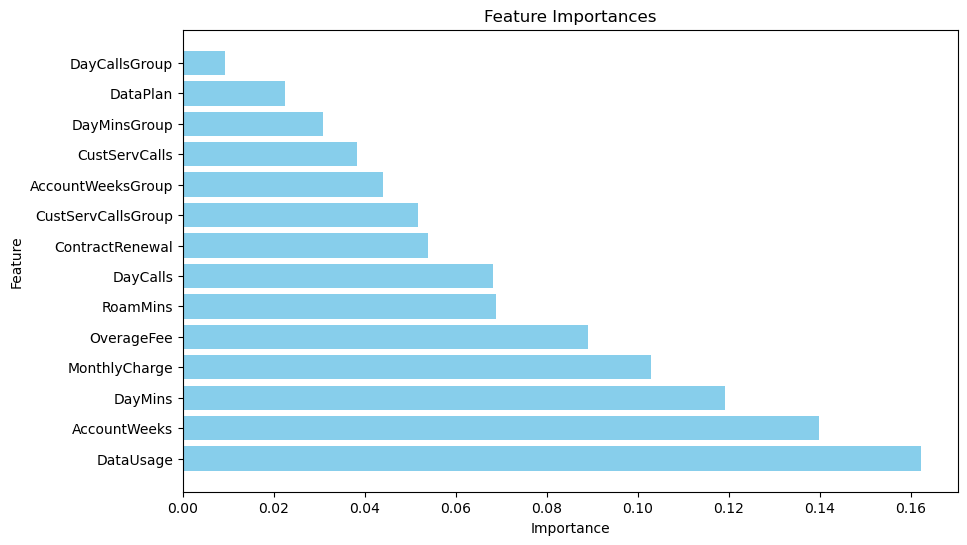

In [65]:

# Get feature importances
feature_importances = model_rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [74]:
indices = np.argsort(model_rf.feature_importances_)[::-1]
col_names = [feature_importance_df['Feature'][i] for i in indices]

#### Modelling with top 10 features

In [ ]:
x_selected = x_resampled[col_names[:10]]

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x_selected,y_resampled,test_size=0.2)

In [81]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [82]:
y_pred = model_rf.predict(x_test)
model_rf.score(x_test,y_test)

0.9403508771929825

In [83]:
print(classification_report(y_test,y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       570
           1       0.96      0.92      0.94       570

    accuracy                           0.94      1140
   macro avg       0.94      0.94      0.94      1140
weighted avg       0.94      0.94      0.94      1140



### Pickling the model

In [84]:
import pickle
filename = 'model.sav'
pickle.dump(model_rf,open(filename,'wb'))

In [85]:
load_model = pickle.load(open(filename,'rb'))
model_score_rf = load_model.score(x_test,y_test)
print(model_score_rf)

0.9403508771929825
